# Aggregate

Plot fusion results across all files

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
import os

In [3]:
with open('config.json') as f:
    data = json.load(f)

if (data['dirName'] != ""):
    full_path = f"{data['dirPath']}/{data['dirName']}"
    print(f"using config experiment: {data['dirName']}")
else:
    # get the most recently run experiment
    path = data['dirPath']
    folder_names = sorted([f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
    print(folder_names)
    most_recent = folder_names[-1]
    print(f"defaulting to most recent experiment: {most_recent}")
    full_path = f"{path}/{most_recent}"

['2025_05_08_14:19:09.987604', '2025_05_08_14:28:26.813704', '2025_05_14_08:14:16.516952', '2025_05_14_09:36:55.196029']
defaulting to most recent experiment: 2025_05_14_09:36:55.196029


In [4]:
csv_path1 = f"{full_path}/aggregate.csv"
csv_path2 = f"{full_path}/aggregateCycles.csv"
img_path = f"{full_path}/aggregateOverall.png"

In [5]:
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df = pd.merge(df1, df2, on=["rule_title", "rule_description", "user_defined_key"], how="inner")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/elizabeth/Desktop/Cambridge/Dissertation/data results/2025_05_14_09:36:55.196029/aggregateCycles.csv'

In [ ]:
df

,rule_title,rule_description,user_defined_key,total_instructions,instructions_after_fuse,instructions_fused,percentage_fused,average_fusion_length,cycles_without_stalls,stalls,total_cycles,cycle_percentage
0,arithmetic end memory/branch,NaN,l-0,271036826384,127649343941,143387482443,52.903321,2.123292,127649343941,28033715618,155683059559,46.248381
1,arithmetic end memory/branch,NaN,l-1,271036826384,271036826384,0,0.000000,1.000000,271036826384,18597353536,289634179920,0.000000
2,arithmetic end memory/branch,NaN,l-2,271036826384,194009276035,77027550349,28.419588,1.397030,194009276035,23381020226,217390296261,24.943149
3,arithmetic end memory/branch,NaN,l-3,271036826384,157888311721,113148514663,41.746546,1.716636,157888311721,24989952956,182878264677,36.858880
4,arithmetic end memory/branch,NaN,l-4,271036826384,140741022404,130295803980,48.073100,1.925784,140741022404,27869175125,168610197529,41.785117
5,arithmetic end memory/branch,NaN,l-5,271036826384,133217710234,137819116150,50.848853,2.034540,133217710234,28024800115,161242510349,44.328908
6,arithmetic end memory/branch,NaN,l-6,271036826384,130668205584,140368620800,51.789501,2.074237,130668205584,28031144139,158699349723,45.206968
7,arithmetic end memory/branch,NaN,l-7,271036826384,129550002194,141486824190,52.202066,2.092141,129550002194,28033155011,157583157205,45.592348
8,arithmetic end memory/branch,NaN,l-8,271036826384,129002989947,142033836437,52.403889,2.101012,129002989947,28033171251,157036161198,45.781205
9,arithmetic end memory/branch,NaN,l-9,271036826384,128669960689,142366865695,52.526761,2.106450,128669960689,28033174048,156703134737,45.896187


In [ ]:
df['category'] = df['user_defined_key'].str[0]  # 'l', 'r', or 'w'
df['x_value'] = df['user_defined_key'].str[2:].astype(int)  # numeric part

In [ ]:
allowed_titles = ['arithmetic end memory/branch']
df = df[df['rule_title'].isin(allowed_titles)]

grouped = df.groupby(['rule_title', 'category'], dropna=False, sort=False)

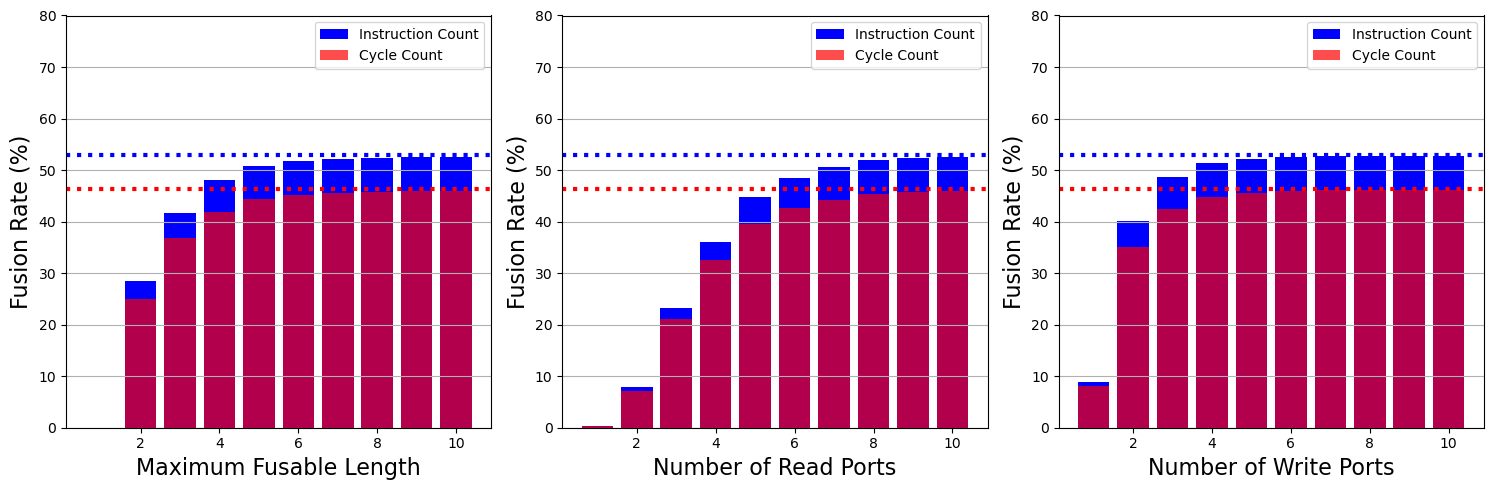

In [ ]:
num_groups = len(grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(grouped):
    data = group_data.reset_index()
    first_value_instructions = data['percentage_fused'].iloc[0]
    axes[i].axhline(y=first_value_instructions, color='blue', linestyle='dotted', linewidth=3)
    axes[i].bar(data['x_value'][1:101], data['percentage_fused'][1:101], color='blue', label='Instruction Count')

    first_value_cycles = data['cycle_percentage'].iloc[0]
    axes[i].axhline(y=first_value_cycles, color='red', linestyle='dotted', linewidth=3)
    axes[i].bar(data['x_value'][1:101], data['cycle_percentage'][1:101], color='red', alpha=0.7, label='Cycle Count')

    # axes[i].set_title(f'{group_name[0]}', fontsize=16)
    xlabel_map = {
        'l': 'Maximum Fusable Length',
        'r': 'Number of Read Ports',
        'w': 'Number of Write Ports',
    }
    axes[i].set_xlabel(xlabel_map[group_name[1]], fontsize=16)
    axes[i].set_ylabel('Fusion Rate (%)', fontsize=16)
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    axes[i].set_ylim(bottom=0, top=80)

    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()